In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pickle
import pandas as pd
from google.colab import files

In [ ]:
Khawa = pd.read_csv("/content/csv_-26.281531_21.368597_fixed_23_0_PT60M.csv")


In [ ]:
Khawa.head()


,air_temp,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,gti,relative_humidity,surface_pressure,wind_direction_10m,wind_speed_10m,zenith,period_end,period
0,16,-149,0,0,0,0,0.0,0,0,0,0,23.9,906.7,182,4.7,123.0,2007-01-01T01:00:00Z,PT60M
1,16,-136,0,0,0,0,0.0,0,0,0,0,25.5,906.7,177,4.7,115.0,2007-01-01T02:00:00Z,PT60M
2,16,-126,0,0,0,0,0.0,0,0,0,0,26.1,906.8,173,4.6,105.0,2007-01-01T03:00:00Z,PT60M
3,16,-118,1,8,2,1,0.0,1,8,2,1,25.6,907.2,170,4.6,94.0,2007-01-01T04:00:00Z,PT60M
4,17,-112,39,531,128,45,0.0,39,531,128,45,23.1,907.8,165,4.4,82.0,2007-01-01T05:00:00Z,PT60M


In [ ]:
Khawa['Year'] = pd.DatetimeIndex(Khawa['period_end']).year
Khawa['Month'] = pd.DatetimeIndex(Khawa['period_end']).month
Khawa['Day'] = pd.DatetimeIndex(Khawa['period_end']).day
Khawa['Hour'] = pd.DatetimeIndex(Khawa['period_end']).hour

In [ ]:
Khawa['Latitude'] = -26.281531
Khawa['Longitude'] = 21.368597

In [ ]:
Khawa['Year'].unique()

array([2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021.,   nan])

In [ ]:
Khawa.columns

Index(['air_temp', 'azimuth', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi',
       'clearsky_gti', 'cloud_opacity', 'dhi', 'dni', 'ghi', 'gti',
       'relative_humidity', 'surface_pressure', 'wind_direction_10m',
       'wind_speed_10m', 'zenith', 'period_end', 'period', 'Year', 'Month',
       'Day', 'Hour', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
Khawa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128980 entries, 0 to 128979
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   air_temp            128980 non-null  int64  
 1   azimuth             128980 non-null  int64  
 2   clearsky_dhi        128980 non-null  int64  
 3   clearsky_dni        128980 non-null  int64  
 4   clearsky_ghi        128980 non-null  int64  
 5   clearsky_gti        128980 non-null  int64  
 6   cloud_opacity       128980 non-null  float64
 7   dhi                 128980 non-null  int64  
 8   dni                 128980 non-null  int64  
 9   ghi                 128980 non-null  int64  
 10  gti                 128980 non-null  int64  
 11  relative_humidity   128980 non-null  float64
 12  surface_pressure    128980 non-null  float64
 13  wind_direction_10m  128980 non-null  int64  
 14  wind_speed_10m      128979 non-null  float64
 15  zenith              128979 non-nul

In [ ]:
Khawa.describe()

,air_temp,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,...,surface_pressure,wind_direction_10m,wind_speed_10m,zenith,Year,Month,Day,Hour,Latitude,Longitude
count,128980.000000,128980.000000,128980.000000,128980.000000,128980.000000,128980.000000,128980.000000,128980.00000,128980.000000,128980.000000,...,128980.000000,128980.000000,128979.000000,128979.000000,128979.000000,128979.000000,128979.000000,128979.000000,1.289800e+05,128980.000000
mean,21.633191,2.656489,47.772096,372.958877,282.833075,310.425399,7.310430,68.50918,303.043425,259.550333,...,906.170997,149.322864,4.224692,90.409547,2013.863505,6.440203,15.708596,11.499779,-2.628153e+01,21.368597
std,8.451830,97.967637,58.628753,411.212322,363.767383,393.914021,15.504014,102.34973,381.831355,342.453269,...,4.323939,111.269360,1.799377,42.402942,4.249379,3.427789,8.798551,6.922286,1.421091e-14,0.000000
min,-4.000000,-180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,893.300000,0.000000,0.100000,5.000000,2007.000000,1.000000,1.000000,0.000000,-2.628153e+01,21.368597
25%,16.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,902.900000,43.000000,3.000000,54.000000,2010.000000,3.000000,8.000000,5.000000,-2.628153e+01,21.368597
50%,22.000000,0.000000,8.000000,49.000000,13.000000,10.000000,0.000000,8.00000,0.000000,12.000000,...,905.700000,147.000000,4.000000,91.000000,2014.000000,6.000000,16.000000,11.000000,-2.628153e+01,21.368597
75%,28.000000,90.000000,92.000000,831.000000,596.000000,685.000000,5.500000,102.00000,700.000000,533.000000,...,909.100000,217.000000,5.300000,126.000000,2018.000000,9.000000,23.000000,17.000000,-2.628153e+01,21.368597
max,43.000000,180.000000,424.000000,1113.000000,1202.000000,1177.000000,97.000000,623.00000,1113.000000,1202.000000,...,923.600000,360.000000,14.100000,175.000000,2021.000000,12.000000,31.000000,23.000000,-2.628153e+01,21.368597


In [ ]:
Khawa = Khawa.drop(['period'], axis=1)

In [ ]:
Khawa.shape

(128980, 23)

In [ ]:
Khawa.isnull().sum()

air_temp              0
azimuth               0
clearsky_dhi          0
clearsky_dni          0
clearsky_ghi          0
clearsky_gti          0
cloud_opacity         0
dhi                   0
dni                   0
ghi                   0
gti                   0
relative_humidity     0
surface_pressure      0
wind_direction_10m    0
wind_speed_10m        1
zenith                1
period_end            1
Year                  1
Month                 1
Day                   1
Hour                  1
Latitude              0
Longitude             0
dtype: int64

In [ ]:
#Interpolate missing values

Khawa = Khawa.interpolate(method='linear')

In [ ]:
# Find the minimum and maximum values in the "Solar Irradiance" column
ghi_min_value = Khawa["clearsky_ghi"].min()
ghi_max_value = Khawa["clearsky_ghi"].max()

print(ghi_min_value,ghi_max_value)

0 1202


In [ ]:
#Creating a heatmap of the correlation matrix of the World_data DataFrame
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_positve_criteria,correlation_negative_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.drop(['Month','Day','Year','Hour','Latitude','Longitude'],axis=1).corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    positiverelevant_features = target[target>correlation_positve_criteria]
    negativerelevant_featuress = target[target<correlation_negative_criteria]
    print(positiverelevant_features)
    print(negativerelevant_featuress)

<ipython-input-18-15b7e978a4b8>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataframe.drop(['Month','Day','Year','Hour','Latitude','Longitude'],axis=1).corr()


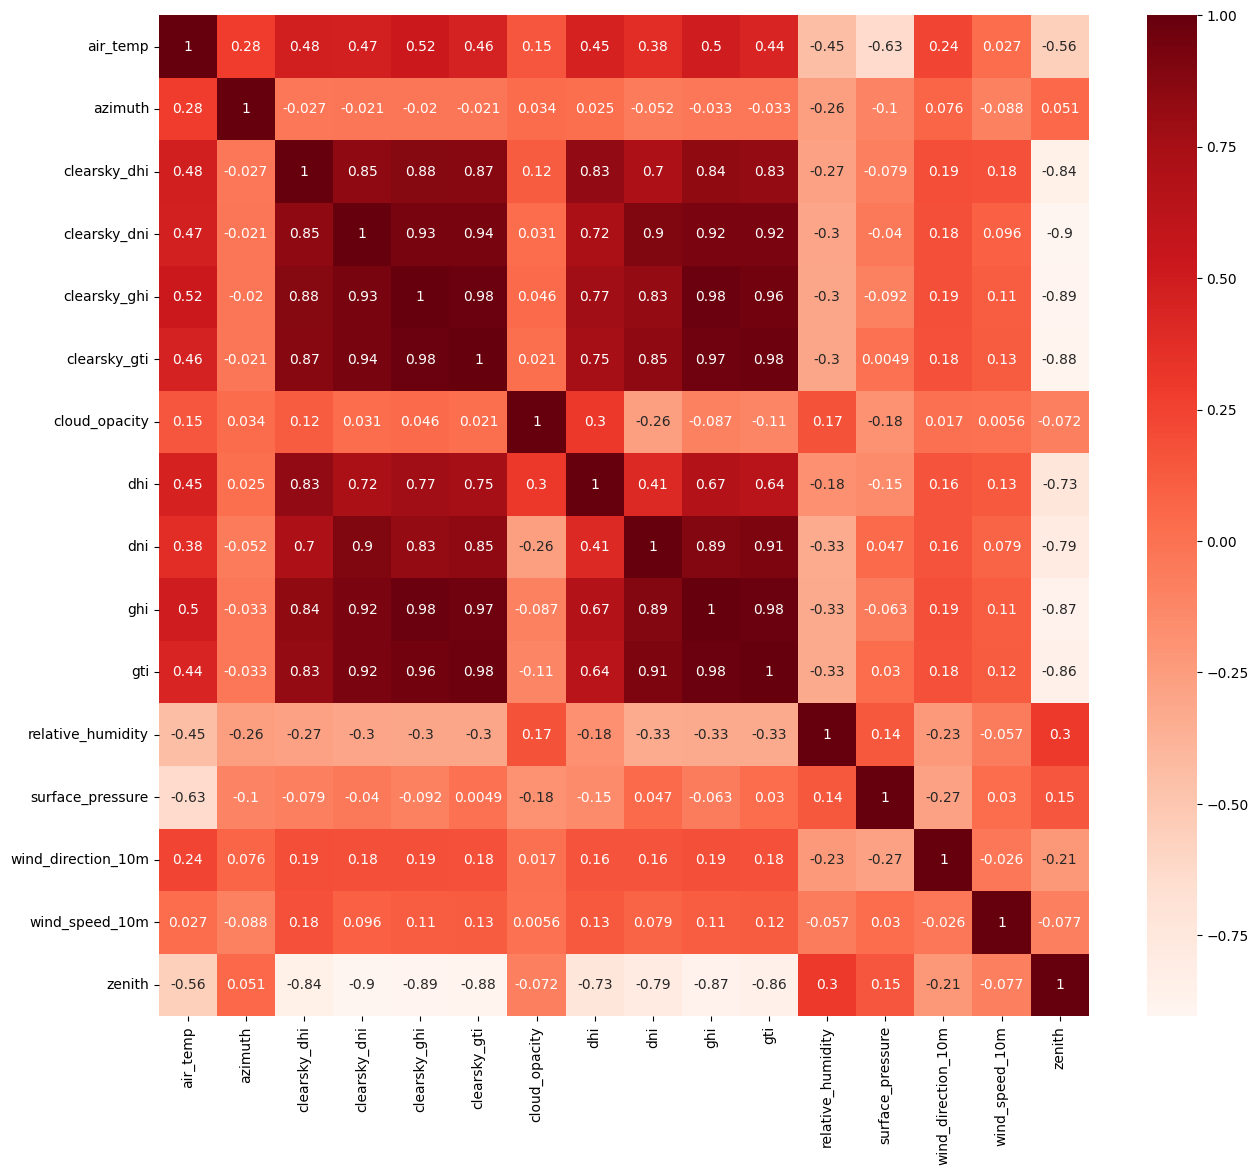

In [ ]:
build_pearson_correlation_matrix_of_dataframe(15, 13, Khawa,'clearsky_ghi', 0.7,-0.7)

clearsky_dhi    0.876575
clearsky_dni    0.933896
clearsky_ghi    1.000000
clearsky_gti    0.982234
dhi             0.773799
dni             0.825360
ghi             0.978124
gti             0.955631
zenith          0.892324
Name: clearsky_ghi, dtype: float64
Series([], Name: clearsky_ghi, dtype: float64)


<ipython-input-20-36c5e9159b31>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=Khawa.groupby('Hour').mean(), x='Hour', y='clearsky_ghi', color='Orange')


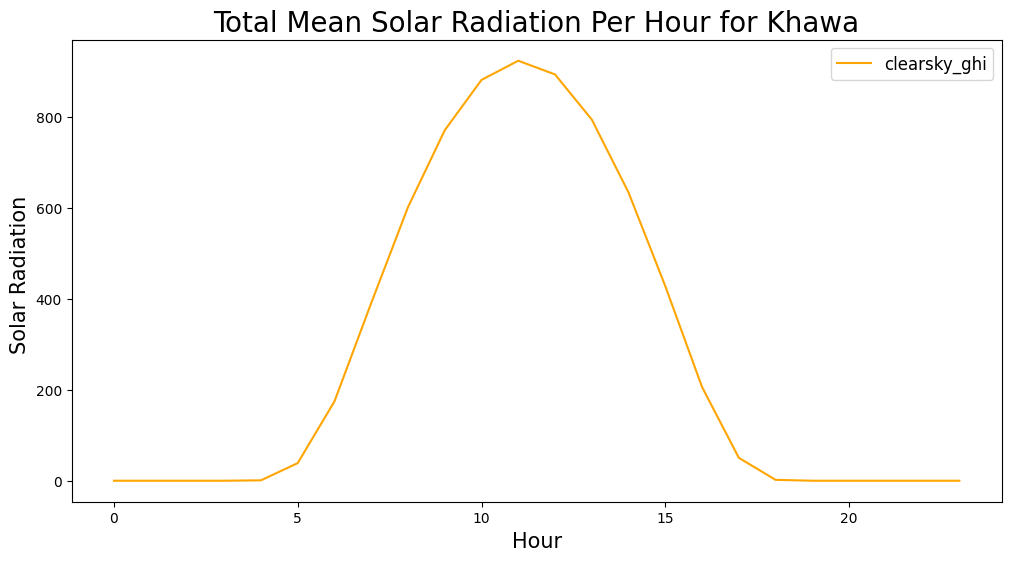

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Khawa.groupby('Hour').mean(), x='Hour', y='clearsky_ghi', color='Orange')

plt.xlabel('Hour', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Hour for Khawa', fontsize=20)
plt.show();

<ipython-input-21-dfbc36503f4c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=Khawa.groupby('Day').mean(), x='Day', y='clearsky_ghi', color='Blue')


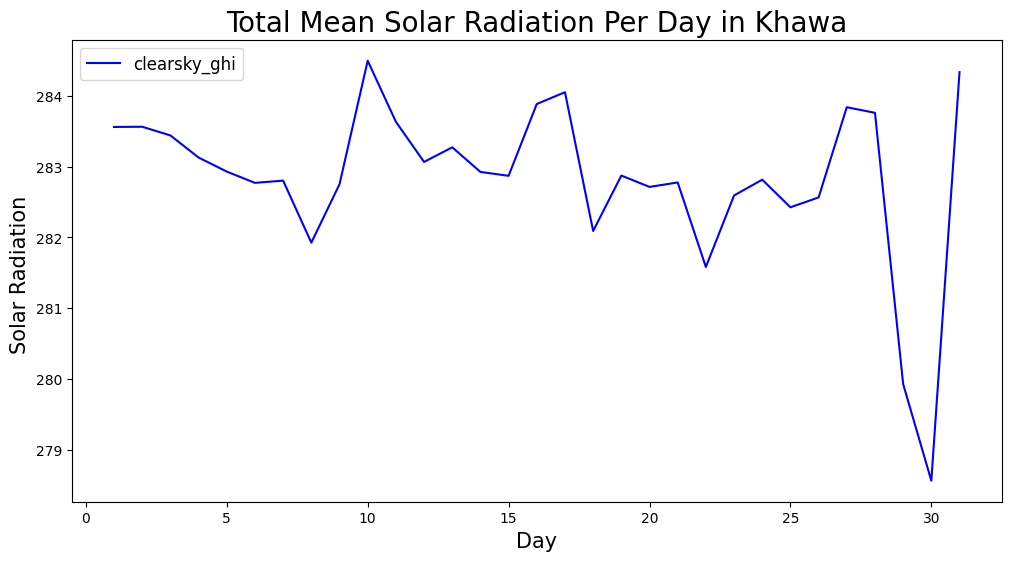

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Khawa.groupby('Day').mean(), x='Day', y='clearsky_ghi', color='Blue')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Day in Khawa', fontsize=20)
plt.show();

<ipython-input-22-59a002297730>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=Khawa.groupby('Month').mean(), x='Month', y='clearsky_ghi', color='Green')


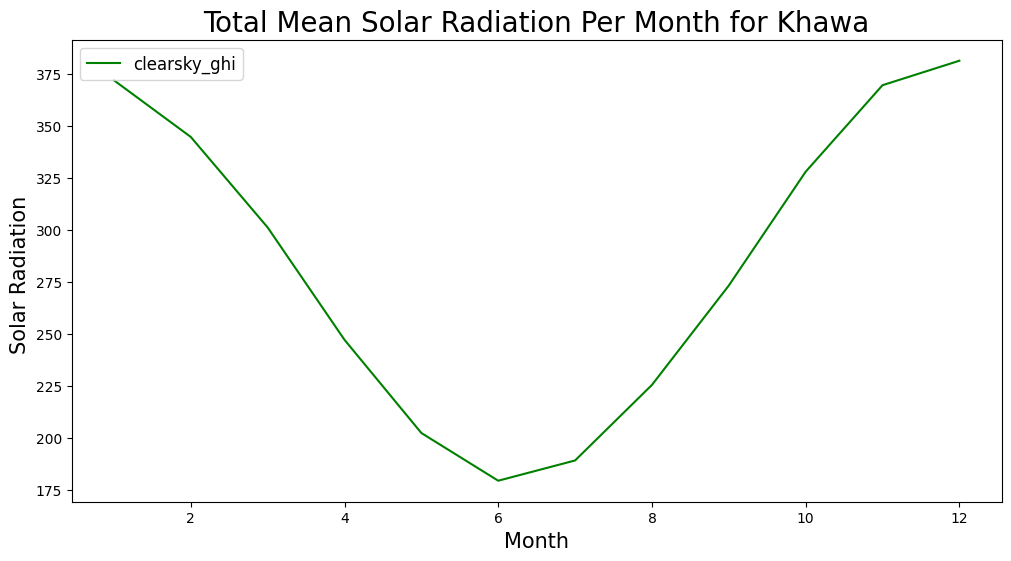

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Khawa.groupby('Month').mean(), x='Month', y='clearsky_ghi', color='Green')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Month for Khawa', fontsize=20)
plt.show();

<ipython-input-23-94ecc7911e7f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=Khawa.groupby('Year').mean(), x='Year', y='clearsky_ghi', color='Red')


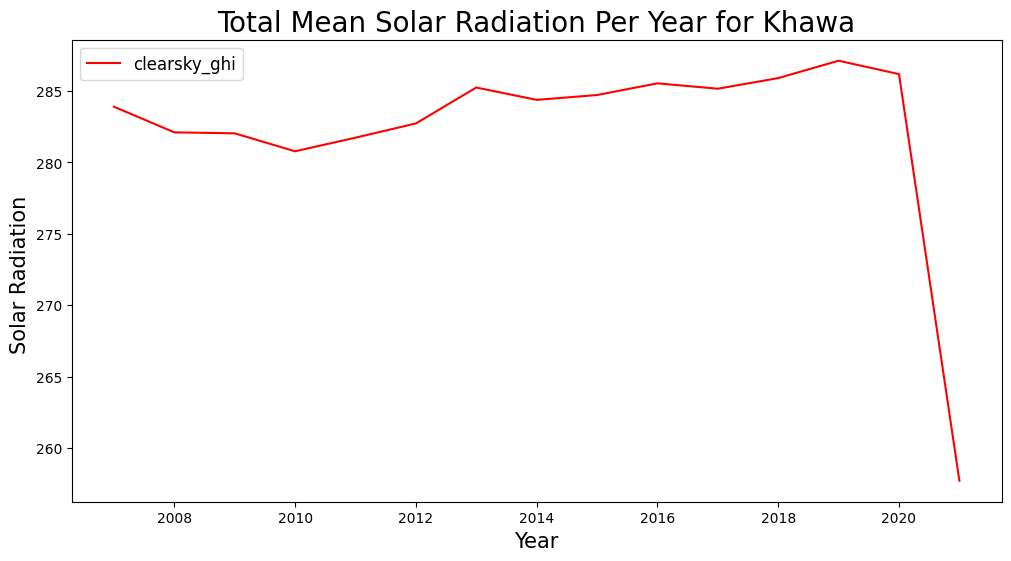

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Khawa.groupby('Year').mean(), x='Year', y='clearsky_ghi', color='Red')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Year for Khawa', fontsize=20)
plt.show();

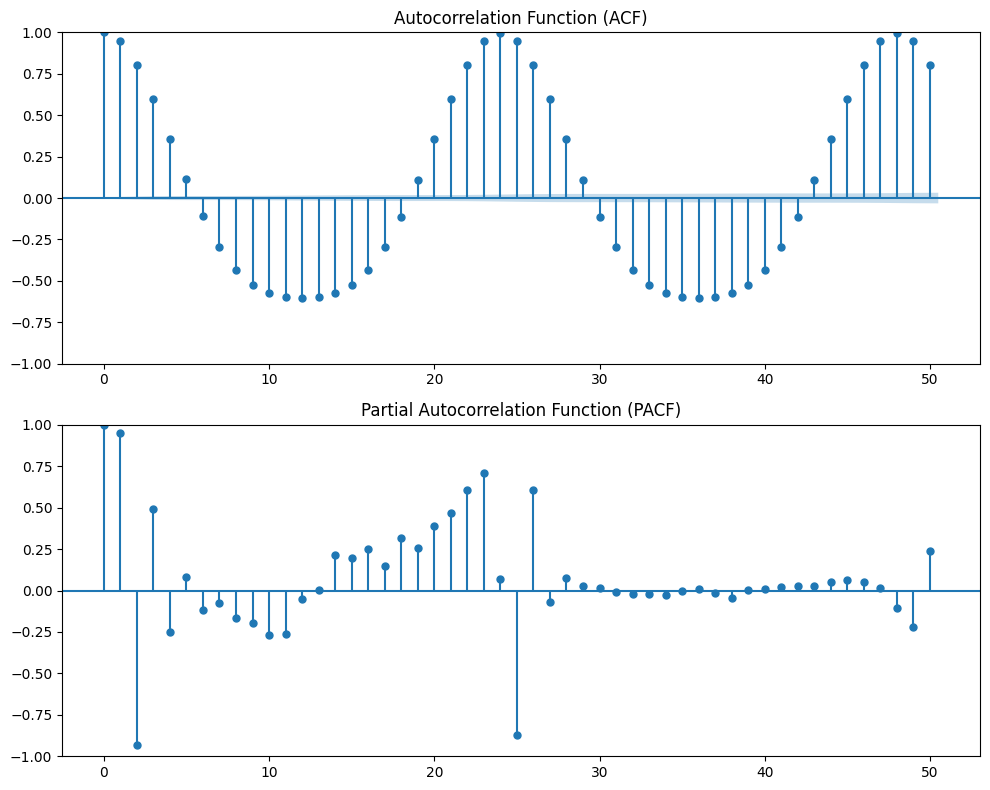

In [ ]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(Khawa['clearsky_ghi'], ax=ax[0], lags=50)  # Adjust 'lags' parameter as needed
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(Khawa['clearsky_ghi'], ax=ax[1], lags=50)  # Adjust 'lags' parameter as needed
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Epoch 1/10
3225/3225 [==============================] - 20s 5ms/step - loss: 0.0033
Epoch 2/10
3225/3225 [==============================] - 16s 5ms/step - loss: 9.2754e-04
Epoch 3/10
3225/3225 [==============================] - 17s 5ms/step - loss: 8.7142e-04
Epoch 4/10
3225/3225 [==============================] - 15s 5ms/step - loss: 8.3971e-04
Epoch 5/10
3225/3225 [==============================] - 15s 5ms/step - loss: 8.3575e-04
Epoch 6/10
3225/3225 [==============================] - 15s 5ms/step - loss: 8.1780e-04
Epoch 7/10
3225/3225 [==============================] - 16s 5ms/step - loss: 8.0139e-04
Epoch 8/10
3225/3225 [==============================] - 16s 5ms/step - loss: 7.8685e-04
Epoch 9/10
3225/3225 [==============================] - 16s 5ms/step - loss: 7.6025e-04
Epoch 10/10
807/807 [==============================] - 3s 3ms/step
MSE: 42.42024107435075
RMSE 6.513082302132435


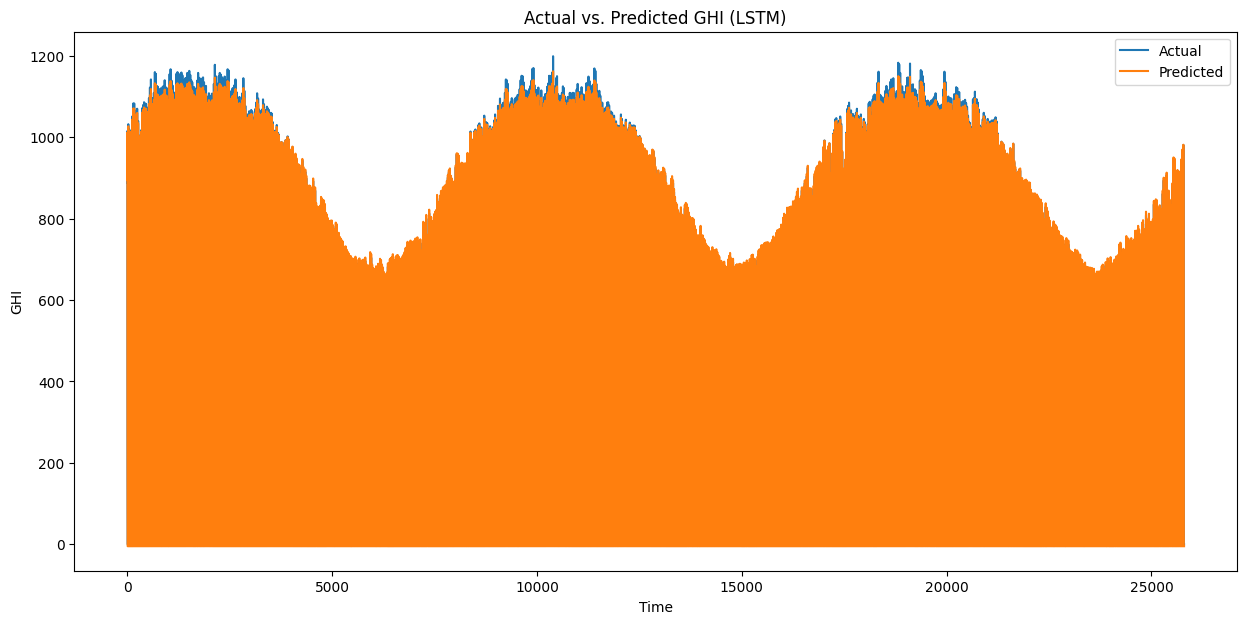

In [ ]:

# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Khawa['clearsky_ghi'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_data, train_data, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
true_values = Khawa['clearsky_ghi'].values[train_size:]
LS_mse = mean_squared_error(true_values, predictions)
LS_rmse = np.sqrt(LS_mse)
print('MSE:', LS_mse)
print('RMSE', LS_rmse)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(true_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('Actual vs. Predicted GHI (LSTM)')
plt.legend()
plt.show()


In [ ]:
# Save model to pickle

import pickle

with open('Khawa_LSTM_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
#Apply random forest

# Prepare the data
X_train = Khawa.drop(['clearsky_ghi','period_end'], axis=1)
y_train = Khawa['clearsky_ghi']

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=50, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate the model
RF_mse = mean_squared_error(y_train, y_pred)
RF_rmse = np.sqrt(RF_mse)
print('MSE:', RF_mse)
print('RMSE', RF_rmse)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('Actual vs. Predicted GHI (Random Forest)')
plt.legend()
plt.show()


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#Create model pickle file
with open('Khawa_RF_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
#Calculating feature importances and sort them in descending order

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [ ]:
# Create a bar plot to display the importance of each feature
fig = plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [ ]:
#Forecast to using rf and show predicted only
from google.colab import files
# Load the saved model
with open('Khawa_RF_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Prepare the data
X_test = Khawa.drop(['clearsky_ghi','period_end'], axis=1)

# Make predictions
y_pred = model.predict(X_test)

# Create a new DataFrame to store the predictions
future_predictions = pd.DataFrame(y_pred, columns=['clearsky_ghi'])

# Set the index of the future_predictions DataFrame
future_predictions.index = pd.date_range(start='2023-01-01', periods=len(y_pred), freq='H')

# Convert the future_predictions DataFrame to a CSV file
future_predictions.to_csv('future_predictions.csv', index=True)

# Download the CSV file
files.download('future_predictions.csv')

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(future_predictions['clearsky_ghi'], label='Predicted GHI')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('Predicted GHI for Khawa from 2023 to 2027')
plt.legend()
plt.show()



In [ ]:
# Plot RMSE for both models



# Create a bar chart to compare the RMSE values
labels = ['LSTM', 'Random Forest']
values = [LS_rmse, RF_rmse]

plt.bar(labels, values)
plt.title('RMSE Comparison between LSTM and Random Forest Models')
plt.ylabel('RMSE')
plt.show()


In [ ]:
#Export results of random forest to dashboard


# Load the saved model
with open('Khawa_RF_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Prepare the data
X_test = Khawa.drop(['clearsky_ghi','period_end'], axis=1)

# Make predictions
y_pred = model.predict(X_test)

# Create a new DataFrame to store the predictions
future_predictions = pd.DataFrame(y_pred, columns=['clearsky_ghi'])

# Set the index of the future_predictions DataFrame
future_predictions.index = pd.date_range(start='2023-01-01', periods=len(y_pred), freq='H')

# Convert the future_predictions DataFrame to a CSV file
future_predictions.to_csv('Khawa_future_predictions.csv', index=True)

# Download the CSV file
files.download('Khawa_future_predictions.csv')


In [ ]:
#KMeans clustering
data = Khawa.drop(['period_end','Latitude','Longitude','Year','Month','Day','Hour'], axis=1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (K)
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans model to the scaled data
kmeans.fit(scaled_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
Khawa['cluster'] = cluster_labels

# Visualize cluster centers (optional)
cluster_centers = kmeans.cluster_centers_

# Plot cluster centers
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.plot(cluster_centers[i], label=f'Cluster {i+1}')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Cluster Centers')
plt.legend()
plt.grid(True)
plt.show()

# Analyze clusters
cluster_counts = Khawa['cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# You can further analyze each cluster to understand the characteristics of transactions/reviews within each cluster
for cluster_id in range(num_clusters):
    cluster_data = Khawa[Khawa['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} - Sample Transactions/Reviews:")
    print(cluster_data.head())

# Optionally, you can save the DataFrame with cluster labels for further analysis
df.to_csv('clustered_data.csv', index=False)

In [ ]:
# Analyze cluster characteristics
for cluster_id in range(num_clusters):
    cluster_data = Khawa[Khawa['cluster'] == cluster_id]

    # Describe feature values within the cluster
    cluster_description = cluster_data.drop(['cluster'], axis=1).describe()
    print(f"\nCluster {cluster_id} - Feature Descriptions:")
    print(cluster_description)

    # Visualize feature distributions within the cluster
    plt.figure(figsize=(12, 6))
    for column in cluster_data.drop(['cluster'], axis=1).columns:
        plt.hist(cluster_data[column], bins=20, alpha=0.5, label=column)
    plt.title(f'Cluster {cluster_id} - Feature Distributions')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Compute silhouette score
silhouette_avg = silhouette_score(data, cluster_labels)

print("Silhouette Score:", silhouette_avg)
